In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import requests
from bs4 import BeautifulSoup

#### Project Overview:

iam building machine learning project on Price prediction of House based various 
feature no of rooms,bathrooms,area etc 

### Data gathering: 
First i will start with Data gathering using Web Scripping because data of DHA defence 
islamabad is not availibe on kaggle etc 
so i have to gathered it using web scripping from website called  zameen.com
so lets begin

In [7]:
df1 = pd.read_csv('dha.csv')
df1 = df1.drop(columns=['Initial Amount','Monthly Installment','Remaining Installments'])

In [8]:
df1 = df1.drop(columns='Added')

In [9]:
df1 = df1.drop(columns=['Location','Purpose'])

## Data Preprocessing

### Messy Data:
- Baths and bedroom should be merge to one column

Done with this part 

### Dirty Data
- `Type`: this column doesnt have any issue
- i entoured one problem that is we have two category House and Flat i want to chnage it to 1 and 2 because i want to apply regression not classification and regression take Numerical val not catgegorical -> done
- `Price`: - pkr and crore should be removed `accuracy` -> done
- inappropriate data type `accuracy` -> solved 
- `bathroom`: no null value
- inappropriate data type obj `accuracy`  -> solved
- `Area`: Kanal and mrla should be removed `accuracy` -> done
- inappropriate data type obj `accuracy` -> done
- and yes the another i have noticed is that Kanal should be converted to Marla `consistency` -> done
- `Bedroom`: same issue of of anapropriate data type -> obj `accuracy` -> done

# now my goal will be to removed these issue before applying algorithm my startegies 
is i start by removing first messy data and then i follow this startegies for removing dirty data

completion -> -> validity ->  accuracy -> consistency 
as we dont have any other type issue we only have accuracy issue so lets begin 

In [15]:
# combining Two columns buy before that i have correct this obj to int etc
df1['Bath(s)']
# oh we have - sign on index 9 that is why concersion gives an error
df1['Bath(s)'] = df1['Bath(s)'].str.replace('-','0')

df1['Bath(s)'] = df1['Bath(s)'].astype(int)

# done
# same with bedrrom

df1['Bath(s)'] = df1['Bath(s)'].str.replace('-','0')


KeyError: 'Bath(s)'

In [14]:
df1['Bedroom(s)'] = df1['Bedroom(s)'].str.replace('-','0')
df1['Bedroom(s)'] = df1['Bedroom(s)'].astype(int)
df1['Bedroom(s)']

# now merge two column to one
df1['Total Room'] = df1['Bedroom(s)'] + df1['Bath(s)']
# now i have to drop Bedrrom and Bathroom no need of that now
df1 = df1.drop(columns=['Bath(s)','Bedroom(s)'])

In [13]:
df1['Price'] = df1['Price'].str.split('R').str[1].str.split('C').str[0]
df1['Price']
# Issue solved
# convert to approp data type int or float but we have problem before that o index 16 we have lack with number
df1['Price'] = df1['Price'].str.split('L').str[0]
df1['Price']
# # now go back to ata type problem
df1['Price'] = df1['Price'].str.strip().astype(float)
df1['Price']

0     12.80
1     12.80
2     14.90
3     16.75
4      1.11
5      9.75
6     14.00
7      3.85
8      2.28
9     11.00
10    16.50
11    10.50
12     2.45
13     6.60
14    10.25
15    11.25
16    95.00
17    11.50
18    12.50
19    11.50
20     7.00
21     6.50
22     9.50
23    12.50
24    12.00
Name: Price, dtype: float64

In [11]:
df1['Area'] = df1['Area'].str.split('Kanal').str[0].str.split('Marla').str[0]
df1['Area']
df1['Area'] = df1['Area'].str.strip().astype(float)

In [24]:
df1
# when i pause value i copy all my code in another file and i run it bahot takh gaya yar 
# we were in kanal wala problem i have to convert kanal to marla let do it

,Unnamed: 0,Type,Price,Area,Total Room
0,0,House,12.80,1.0,11
1,1,House,12.80,1.0,11
2,2,House,14.90,1.0,12
3,3,House,16.75,1.1,13
4,4,Flat,1.11,5.5,4
5,5,House,9.75,1.0,12
6,6,House,14.00,1.0,11
7,7,House,3.85,11.0,7
8,8,Flat,2.28,10.0,6
9,9,House,11.00,1.0,8


In [28]:
df1['Area'] = df1['Area'].apply(lambda x: x*20 if x== 1.0 else x)

In [29]:
df1['Area']

0     20.0
1     20.0
2     20.0
3      1.1
4      5.5
5     20.0
6     20.0
7     11.0
8     10.0
9     20.0
10    20.0
11    20.0
12    10.0
13    11.0
14    20.0
15    20.0
16     5.1
17    20.0
18    20.0
19    20.0
20    10.0
21    10.0
22    20.0
23    20.0
24    20.0
Name: Area, dtype: float64

Type

In [34]:
# this is tricky one let try it

df1['Type'] = df1['Type'].replace({'House': 2,'Flat': 1})

C:\Users\Qur\AppData\Local\Temp\ipykernel_10228\298949363.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Type'] = df1['Type'].replace({'House': 2,'Flat': 1})


In [35]:
df1

,Unnamed: 0,Type,Price,Area,Total Room
0,0,2,12.80,20.0,11
1,1,2,12.80,20.0,11
2,2,2,14.90,20.0,12
3,3,2,16.75,1.1,13
4,4,1,1.11,5.5,4
5,5,2,9.75,20.0,12
6,6,2,14.00,20.0,11
7,7,2,3.85,11.0,7
8,8,1,2.28,10.0,6
9,9,2,11.00,20.0,8


In [36]:
# now for the sake of future use i have to saved it 



In [43]:
df2 = pd.read_csv('Clean.csv')
df2 = df2.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [45]:
df2
# now this is my clean data set
# now check for statistical check

df2.describe()
# that look okay 


,Type,Price,Area,Total Room
count,25.000000,25.000000,25.000000,25.000000
mean,1.840000,13.391600,15.748000,10.160000
std,0.374166,17.525436,6.121963,2.939388
min,1.000000,1.110000,1.100000,4.000000
25%,2.000000,7.000000,10.000000,8.000000
50%,2.000000,11.250000,20.000000,11.000000
75%,2.000000,12.800000,20.000000,12.000000
max,2.000000,95.000000,20.000000,15.000000


### Start s with EDA

<Axes: ylabel='Frequency'>

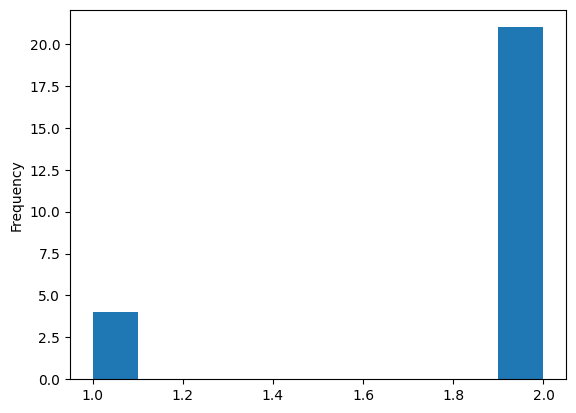

In [48]:
df2['Type'].plot(kind='hist')

# no issue with this data


In [62]:
df2['Price'].skew()
# highly skewd data
# df2['Price'].plot(kind='kde')
# right skewd
# we shoudl apply Transformation here  let apply log
# df2['Price'] = np.log(df2['Price']).plot(kind='kde')
df2['Price'].skew()

TypeError: float() argument must be a string or a real number, not 'Axes'

In [68]:
# off i get struck again 
df = np.log(df2['Total Room'])

In [78]:
df1 = df1.drop(columns='Unnamed: 0')

In [85]:
df1['Prices'] = np.log(df1['Price'])
df1 = df1.drop(columns='Price')

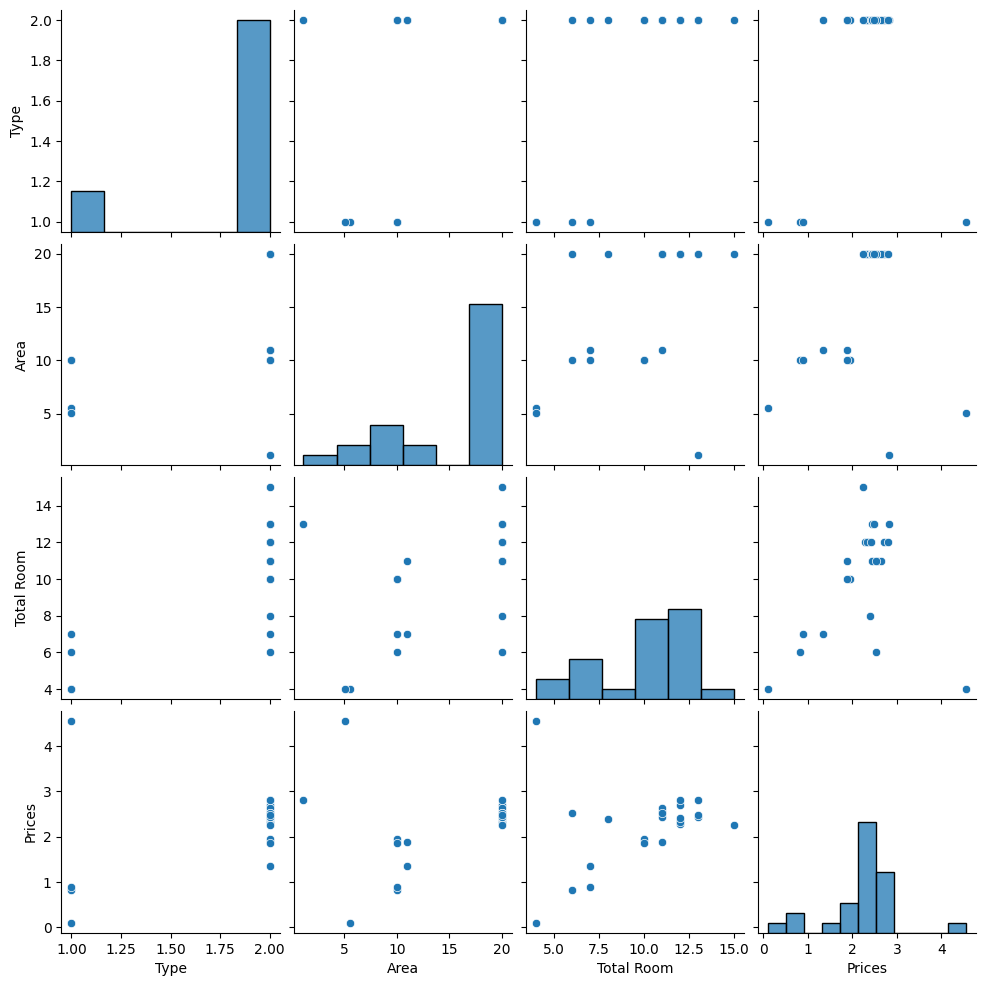

In [90]:
# pair plot for my my data set

sns.pairplot(df1)
# i forgot the syntex let me check it


Bi variate Analysis

In [100]:
df3 = df1.copy()
df3 = np.log(df3)

In [103]:
df3.skew()

Type         -1.975409
Area         -2.491110
Total Room   -1.366026
Prices       -3.300313
dtype: float64

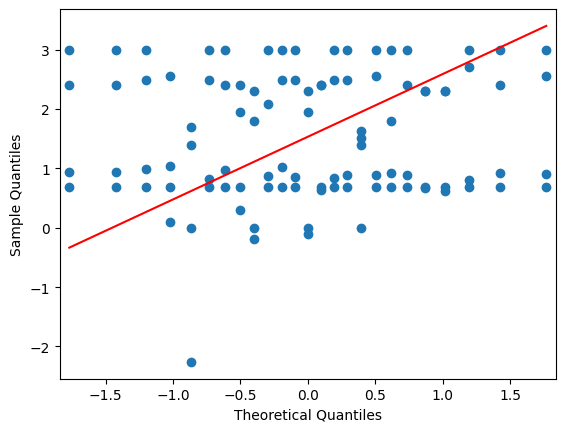

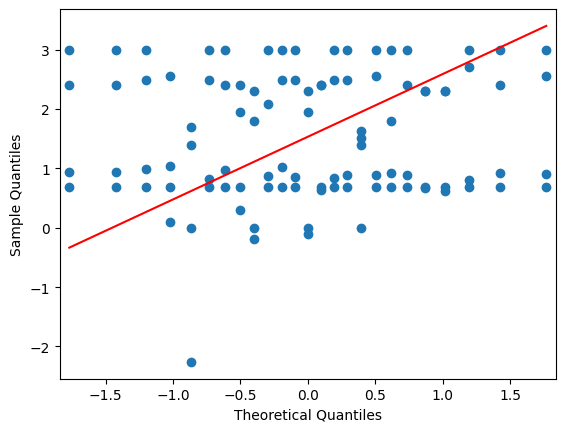

In [112]:
import statsmodels.api as sm
sm.qqplot(df3,line='s')

In [114]:
import scipy.stats as stats
stats.boxcox(df3)

ValueError: Data must be 1-dimensional.

In [115]:
transformed_data, fitted_lambda = stats.boxcox(df3)

ValueError: Data must be 1-dimensional.

In [121]:
df3
x = df3[['Type','Area','Total Room']]
y = df3['Prices']


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,train_size=0.9,random_state=20)

In [134]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(x_test)

array([ 0.84597242,  0.84597242, -0.16614183])

In [136]:
y_test

19    0.892959
23    0.926530
12   -0.109717
Name: Prices, dtype: float64